# OUTLIERS

In [2]:
# Excluding the outlier data for horsepower
# subtrct value of horsepower by mean and then comparing with 3 S.D.
# 3 S.D. = 99.7 % valaues so values greater than that are outliers.
# np. abs willl give only true results.

#df_new_no_outliers=df[np.abs(df.horsepower-df.horsepower.mean())<=(3*df.horsepower.std())]

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('train2.csv')

# OUTLIERS IN BIVARIATE

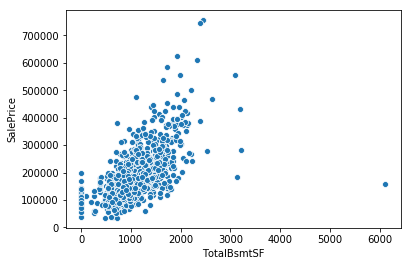

In [5]:
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=df)

In [6]:
# removing outlier
df[df['TotalBsmtSF']>6000]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1260,1261,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,NaN,NaN,160000


In [7]:
df.drop([1260],inplace=True)

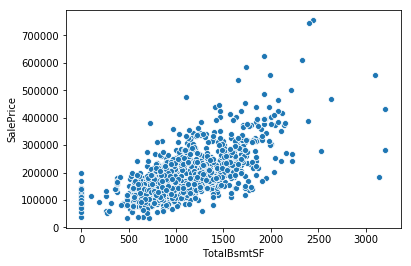

In [8]:
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=df)

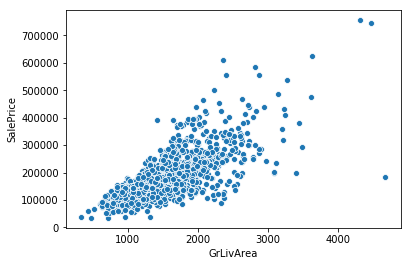

In [9]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df)

In [10]:
df.sort_values(by='GrLivArea',ascending=False)
a=df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)]

In [11]:
a.index

Int64Index([500], dtype='int64')

In [12]:
df.drop(a.index,inplace=True)

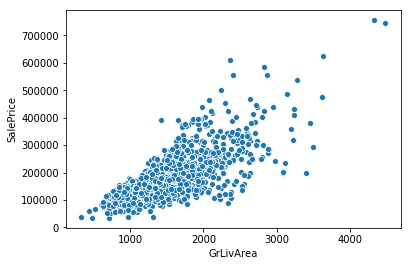

In [13]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df)

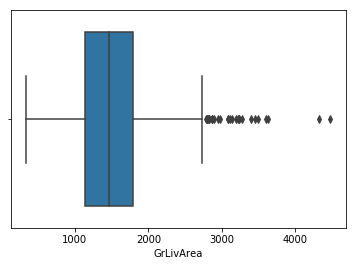

In [14]:
sns.boxplot(x='GrLivArea',data=df)

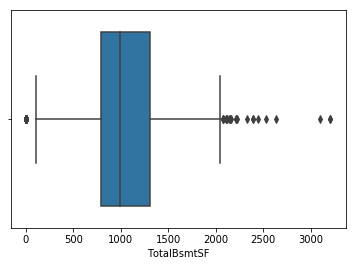

In [15]:
sns.boxplot(x='TotalBsmtSF',data=df)

In [16]:
df['TotalBsmtSF'].skew()

0.5396126855376815

In [17]:
# quartile 1
q1=df['TotalBsmtSF'].quantile(0.25)
q1

796.0

In [18]:
# quartile 3
q3=df['TotalBsmtSF'].quantile(0.75)
q3

1302.0

In [19]:
# iqr
iqr=q3-q1
iqr

506.0

In [20]:
# median
q2=df['TotalBsmtSF'].quantile(0.50)
q2

993.5

In [21]:
#  lower end wwhisker value
lower_limit=q1-1.5*(iqr)
lower_limit

37.0

In [22]:
# upper end whisker value
upper_limit=q3+1.5*(iqr)
upper_limit

2061.0

In [23]:
# no of rows where the outliers below lower limit using lower limit
#len(df[df['TotalBsmtSF']<39.5])
# Or
df[df['TotalBsmtSF']<lower_limit].shape[0]

33

In [24]:
# n0. of rows where the outliers above upper limit using upper limit
len(df[df['TotalBsmtSF']>2059.5])

21

## when df is  not normally distributed

In [25]:
# check in whole datafranme
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr= q3-q1
ll= q1-1.5*iqr
ul=q3+1.5*iqr

In [26]:
q1

Id                354.75
OverallQual         5.00
YearBuilt        1954.00
TotalBsmtSF       796.00
GrLivArea        1131.75
FullBath            1.00
GarageCars          1.00
GarageArea        323.50
SalePrice      130000.00
Name: 0.25, dtype: float64

In [27]:
df_box_plot=pd.concat([ll,q1,q3,ul],axis=1,keys=['LL','Q1','Q3','UL'])
df_box_plot

,LL,Q1,Q3,UL
Id,-708.000,354.75,1063.25,2126.000
OverallQual,2.000,5.00,7.00,10.000
YearBuilt,1883.500,1954.00,2001.00,2071.500
TotalBsmtSF,37.000,796.00,1302.00,2061.000
GrLivArea,152.625,1131.75,1784.50,2763.625
FullBath,-0.500,1.00,2.00,3.500
GarageCars,-0.500,1.00,2.00,3.500
GarageArea,-55.250,323.50,576.00,954.750
SalePrice,2500.000,130000.00,215000.00,342500.000


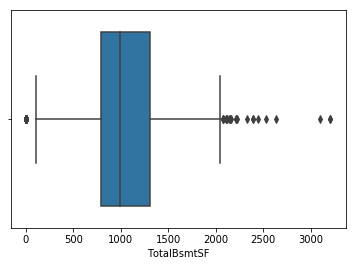

In [28]:
sns.boxplot(x='TotalBsmtSF',data=df)

In [29]:
# checking outliers more than 3000
# if less values we can drop them
df[df['TotalBsmtSF']>3000].shape[0]

3

In [30]:
# dropping 3 values
df.drop(df[df['TotalBsmtSF']>3000].index,inplace=True)

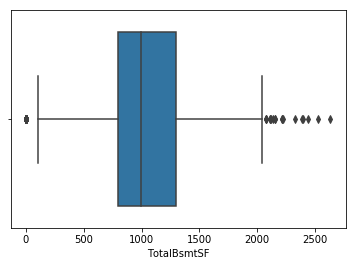

In [31]:
# now we can see that 3000 is not there
sns.boxplot(x='TotalBsmtSF',data=df)

## other than dropping outlier we can do CAPPING also

In [32]:
# capping setting the outlier values to the upper limit
# check in whole datafranme
q1=df['TotalBsmtSF'].quantile(0.25)
q3=df['TotalBsmtSF'].quantile(0.75)
iqr= q3-q1
ll= q1-1.5*iqr
ul=q3+1.5*iqr

In [33]:
ul

2053.5

In [34]:
# capping replacing the values to upper limit
df['TotalBsmtSF']=np.where(df['TotalBsmtSF']>ul,ul,df['TotalBsmtSF'])

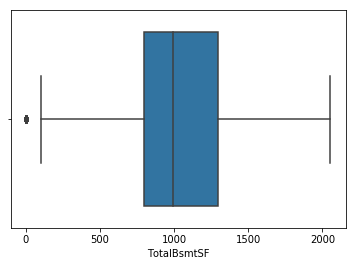

In [35]:
# removing upper limit
sns.boxplot(x='TotalBsmtSF',data=df)

In [36]:
# capping replacing the values to lower limit
df['TotalBsmtSF']=np.where(df['TotalBsmtSF']<ll,ll,df['TotalBsmtSF'])

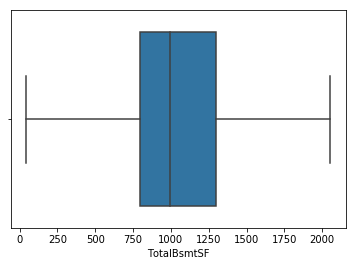

In [37]:
# removing lower outlier
sns.boxplot(x='TotalBsmtSF',data=df)

## Now try this same with other column

# NOw we will use 3 S.D for outliers And we should only check one variable for one time.

# when data is normally distributed

In [38]:

#df_new_no_outliers=df[np.abs(df.horsepower-df.horsepower.mean())<=(3*df.horsepower.std())]
# now we have taken upper limit
ul_gr=df['GrLivArea'].mean()+3*df['GrLivArea'].std()
ul_gr

3034.566397693935

In [39]:
# lower limit here
ll_gr=df['GrLivArea'].mean()-3*df['GrLivArea'].std()
ll_gr

-9.400084884310445

In [40]:
# no of outliers from upper limit
df[df['GrLivArea']>ul_gr].shape[0]

15

In [41]:
# no of. outliers from lower limit
df[df['GrLivArea']<ll_gr].shape[0]

0

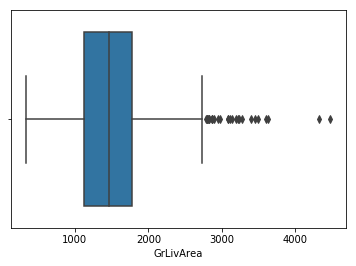

In [42]:
sns.boxplot(x='GrLivArea',data=df)

In [43]:
# dropping those outliers
df.drop(df[df['GrLivArea']>ul_gr].index,inplace=True)

In [44]:
# checking those outliers that are dropped
# no of outliers from upper limit
df[df['GrLivArea']>ul_gr].shape[0]

0

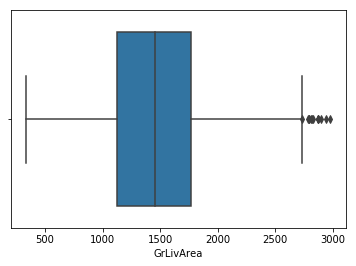

In [45]:
# It can still show the outliers but these are now acceptable
sns.boxplot(x='GrLivArea',data=df)

## Other method for Outlier detection

In [46]:
# for this we will add a new column for our data z score=(x-mean/sigma)
df['z_score-garge_area']=(df['GarageArea']-df['GarageArea'].mean())/df['GarageArea'].std()

In [47]:
df.head(3)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,z_score-garge_area
0,1,7,2003,856.0,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500,0.371416
1,2,6,1976,1262.0,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500,-0.042936
2,3,7,2001,920.0,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500,0.653928


In [48]:
# values less than -3 or more than 3 we can either drop or do capping in that new column of z-score